In [1]:
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models import TabNetModelConfig
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import first_analysis

In [2]:
def test_regression_TabNet(
    regression_data,
    multi_target,
    continuous_cols,
    categorical_cols,
    continuous_feature_transform,
    normalize_continuous_features,
    target_range,
    batch_size,
    epochs
):
    (train, test, target) = regression_data
    data_config = DataConfig(
        target=target + ["MedInc"] if multi_target else target,
        continuous_cols=continuous_cols,
        categorical_cols=categorical_cols,
        continuous_feature_transform=continuous_feature_transform,
        normalize_continuous_features=normalize_continuous_features,
        #num_workers=num_workers
    )
    model_config_params = {"task": "regression", "metrics":["mean_absolute_percentage_error","mean_absolute_error", "r2_score"]}
    if target_range:
        _target_range = []
        for target in data_config.target:
            _target_range.append(
                (
                    float(train[target].min()),
                    float(train[target].max()),
                )
            )
        model_config_params["target_range"] = _target_range
    model_config = TabNetModelConfig(**model_config_params)
    trainer_config = TrainerConfig(
        max_epochs=epochs,
        checkpoints=None,
        early_stopping=None,
        accelerator="cpu",
        fast_dev_run=False,
        batch_size= batch_size
    )
    optimizer_config = OptimizerConfig()
 
    tabular_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )
    tabular_model.fit(train=train)
 
    result = tabular_model.evaluate(test)
    #assert "test_mean_squared_error" in result[0].keys()
    pred_df = tabular_model.predict(test)
    assert pred_df.shape[0] == test.shape[0]
    #print(result)
    return result
    

def input_Tab_tests(df_train, df_test, y_train, y_test):
    ref_df_train = pd.DataFrame(df_train)
    ref_df_test = pd.DataFrame(df_test)
 
    ref_df_train.columns = ref_df_train.columns.astype(str)
    ref_df_test.columns = ref_df_test.columns.astype(str)
 
    ref_df_train['Year'] = y_train['Year']
    ref_df_test['Year'] = y_test['Year']

    lista = list(ref_df_train.columns)
    lista_target_range = list(range(1900, 2024))
 
    target_column = str(ref_df_train.columns[-1])
   
    return (ref_df_train, ref_df_test, lista, lista_target_range, target_column)

def hyperparameter(batch_size, epochs, df_train, df_test):
    ref_df_train, ref_df_test, lista, lista_target_range, target_column = input_Tab_tests(df_train, df_test)
    result = test_regression_TabNet(regression_data=(ref_df_train, ref_df_test, [target_column]), multi_target = None,
        continuous_cols = lista,
        categorical_cols = [],
        continuous_feature_transform = None,
        normalize_continuous_features = False,
        target_range=True,
        batch_size=batch_size,
        epoch=epochs )
    return result

In [3]:
# # DA PROVARE CON DIVERSI DATASET --> FATTO
# X_train = np.load("./Datasets/Train_Val_Test/Scaled/X_train_scaled.npy")
# X_val = np.load("./Datasets/Train_Val_Test/Scaled/X_val_scaled.npy")
# y_train, y_val = first_analysis.load_df("./Datasets/Train_Val_Test/y_train.csv", "./Datasets/Train_Val_Test/y_val.csv")

In [4]:
# X_train = np.load("./Datasets/Train_Val_Test/Scaled/no_outliers/X_train_scaled.npy")
# X_val = np.load("./Datasets/Train_Val_Test/Scaled/no_outliers/X_val_scaled.npy")
# y_train, y_val = first_analysis.load_df("./Datasets/Train_Val_Test/y_train.csv", "./Datasets/Train_Val_Test/y_val.csv")

In [5]:
X_train = np.load("./Datasets/Train_Val_Test/PCA/principals_components_train.npy")
X_val = np.load("./Datasets/Train_Val_Test/PCA/principals_components_val.npy")
y_train, y_val = first_analysis.load_df("./Datasets/Train_Val_Test/y_train.csv", "./Datasets/Train_Val_Test/y_val.csv")

In [6]:
# FATTO
# X_train = np.load("./Datasets/Train_Val_Test/PCA/no_outliers/principals_components_train.npy")
# X_val = np.load("./Datasets/Train_Val_Test/PCA/no_outliers/principals_components_val.npy")
# y_train, y_val = first_analysis.load_df("./Datasets/Train_Val_Test/y_train.csv", "./Datasets/Train_Val_Test/y_val.csv")

In [7]:
ref_df_train, ref_df_test, lista, lista_target_range, target_column = input_Tab_tests(X_train, X_val, y_train, y_val)

In [8]:
epochs = list(range(5, 11))
batch_size = list(range(50, 450, 50))
results = []
for j,batch in enumerate(batch_size):
    for i,epoch in enumerate(epochs):
        result = test_regression_TabNet(regression_data=(ref_df_train, ref_df_test, [target_column]), multi_target = None,
            continuous_cols = lista,
            categorical_cols = [],
            continuous_feature_transform = None,
            normalize_continuous_features = False,
            target_range=True,
            batch_size=batch,
            epochs=epoch )
        result[0]["batch_size"] = batch
        result[0]["epochs"] = epoch
        results.append(result)
        print("batch_size: %d / %d      epoch: %d / %d"%(j,(len(batch_size)-1),i,(len(epochs)-1)))

2024-08-08 00:28:34,343 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 00:28:34,525 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 00:28:34,628 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 00:28:34,802 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 00:28:34,877 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 00:28:35,262 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-08-08 00:42:30,030 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 00:42:30,035 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.8429693579673767          │
│      test_mean_absolute_error       │         0.6097307801246643          │
│ test_mean_absolute_percentage_error │        0.0003059298906009644        │
│            test_r2_score            │         0.9920616745948792          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 0 / 7      epoch: 0 / 5


2024-08-08 00:43:14,190 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 00:43:14,236 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 00:43:14,343 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 00:43:14,491 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 00:43:14,539 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 00:43:14,565 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-08-08 00:58:42,227 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 00:58:42,231 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.7247182726860046          │
│      test_mean_absolute_error       │         0.5737888216972351          │
│ test_mean_absolute_percentage_error │        0.0002874310011975467        │
│            test_r2_score            │         0.9932091236114502          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 0 / 7      epoch: 1 / 5


2024-08-08 00:59:23,952 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 00:59:24,001 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 00:59:24,097 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 00:59:24,249 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 00:59:24,446 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 00:59:24,464 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-08-08 01:17:40,278 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 01:17:40,281 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.6202314496040344          │
│      test_mean_absolute_error       │         0.5774983167648315          │
│ test_mean_absolute_percentage_error │        0.0002894784847740084        │
│            test_r2_score            │         0.9941224455833435          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 0 / 7      epoch: 2 / 5


2024-08-08 01:18:24,475 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 01:18:24,523 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 01:18:24,623 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 01:18:24,779 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 01:18:24,831 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 01:18:24,865 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-08-08 01:39:02,737 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 01:39:02,741 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.5993791222572327          │
│      test_mean_absolute_error       │         0.5502117872238159          │
│ test_mean_absolute_percentage_error │        0.0002761660434771329        │
│            test_r2_score            │         0.9944563508033752          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 0 / 7      epoch: 3 / 5


2024-08-08 01:39:46,569 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 01:39:46,616 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 01:39:46,714 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 01:39:46,861 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 01:39:46,907 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 01:39:46,935 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-08-08 02:03:07,564 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 02:03:07,567 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.6448598504066467          │
│      test_mean_absolute_error       │         0.5456764101982117          │
│ test_mean_absolute_percentage_error │       0.00027413052157498896        │
│            test_r2_score            │          0.994067907333374          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 0 / 7      epoch: 4 / 5


2024-08-08 02:03:51,565 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 02:03:51,613 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 02:03:51,707 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 02:03:51,866 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 02:03:51,907 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 02:03:51,936 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


2024-08-08 02:29:43,279 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 02:29:43,282 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          1.353994369506836          │
│      test_mean_absolute_error       │         0.7947871088981628          │
│ test_mean_absolute_percentage_error │        0.0003996626765001565        │
│            test_r2_score            │         0.9875002503395081          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 0 / 7      epoch: 5 / 5


2024-08-08 02:30:26,076 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 02:30:26,123 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 02:30:26,222 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 02:30:26,378 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 02:30:26,423 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 02:30:26,447 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-08-08 02:37:07,894 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 02:37:07,898 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.2480326890945435          │
│      test_mean_absolute_error       │         0.6900999546051025          │
│ test_mean_absolute_percentage_error │        0.0003460682346485555        │
│            test_r2_score            │         0.9885782599449158          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 1 / 7      epoch: 0 / 5


2024-08-08 02:37:31,568 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 02:37:31,624 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 02:37:31,726 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 02:37:31,881 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 02:37:31,924 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 02:37:31,950 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-08-08 02:45:50,945 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 02:45:50,950 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.9327231049537659          │
│      test_mean_absolute_error       │         0.6089925169944763          │
│ test_mean_absolute_percentage_error │       0.00030557194259017706        │
│            test_r2_score            │         0.9914904832839966          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 1 / 7      epoch: 1 / 5


2024-08-08 02:46:15,677 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 02:46:15,726 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 02:46:15,824 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 02:46:15,990 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 02:46:16,032 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 02:46:16,064 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-08-08 02:56:00,080 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 02:56:00,084 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.6018324494361877          │
│      test_mean_absolute_error       │         0.47125503420829773         │
│ test_mean_absolute_percentage_error │        0.0002362695086048916        │
│            test_r2_score            │          0.994515061378479          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 1 / 7      epoch: 2 / 5


2024-08-08 02:56:23,788 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 02:56:23,837 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 02:56:23,935 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 02:56:24,092 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 02:56:24,138 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 02:56:24,160 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-08-08 03:07:22,580 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 03:07:22,583 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.4729595184326172          │
│      test_mean_absolute_error       │         0.4203440546989441          │
│ test_mean_absolute_percentage_error │       0.00021081829618196934        │
│            test_r2_score            │         0.9956802129745483          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 1 / 7      epoch: 3 / 5


2024-08-08 03:07:48,460 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 03:07:48,509 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 03:07:48,609 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 03:07:48,770 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 03:07:48,821 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 03:07:48,847 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-08-08 03:20:13,165 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 03:20:13,169 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.5928300023078918          │
│      test_mean_absolute_error       │         0.49216949939727783         │
│ test_mean_absolute_percentage_error │        0.0002472102642059326        │
│            test_r2_score            │         0.9946159720420837          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 1 / 7      epoch: 4 / 5


2024-08-08 03:20:36,629 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 03:20:36,677 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 03:20:36,769 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 03:20:36,916 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 03:20:36,961 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 03:20:37,005 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


2024-08-08 03:34:29,622 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 03:34:29,627 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.3699846565723419          │
│      test_mean_absolute_error       │         0.3640163540840149          │
│ test_mean_absolute_percentage_error │        0.000182494695764035         │
│            test_r2_score            │         0.9965789914131165          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 1 / 7      epoch: 5 / 5


2024-08-08 03:34:54,265 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 03:34:54,309 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 03:34:54,404 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 03:34:54,579 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 03:34:54,628 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 03:34:54,656 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-08-08 03:39:56,214 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 03:39:56,218 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.5667510032653809          │
│      test_mean_absolute_error       │         0.8476539254188538          │
│ test_mean_absolute_percentage_error │        0.0004247844044584781        │
│            test_r2_score            │         0.9855878949165344          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 2 / 7      epoch: 0 / 5


2024-08-08 03:40:14,498 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 03:40:14,542 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 03:40:14,635 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 03:40:14,784 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 03:40:14,826 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 03:40:14,849 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-08-08 03:46:03,106 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 03:46:03,110 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.3380918502807617          │
│      test_mean_absolute_error       │         0.7914258241653442          │
│ test_mean_absolute_percentage_error │       0.00039673838182352483        │
│            test_r2_score            │         0.9876871705055237          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 2 / 7      epoch: 1 / 5


2024-08-08 03:46:21,436 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 03:46:21,490 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 03:46:21,588 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 03:46:21,738 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 03:46:21,789 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 03:46:21,814 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-08-08 03:53:27,144 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 03:53:27,148 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.8622967004776001          │
│      test_mean_absolute_error       │          0.629237711429596          │
│ test_mean_absolute_percentage_error │       0.00031516706803813577        │
│            test_r2_score            │         0.9920761585235596          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 2 / 7      epoch: 2 / 5


2024-08-08 03:53:46,031 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 03:53:46,129 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 03:53:46,240 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 03:53:46,401 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 03:53:46,442 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 03:53:46,466 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-08-08 04:01:55,998 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 04:01:56,001 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.7127598524093628          │
│      test_mean_absolute_error       │          0.557126522064209          │
│ test_mean_absolute_percentage_error │        0.0002790637081488967        │
│            test_r2_score            │         0.9934591054916382          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 2 / 7      epoch: 3 / 5


2024-08-08 04:02:14,829 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 04:02:14,876 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 04:02:14,968 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 04:02:15,126 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 04:02:15,170 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 04:02:15,198 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-08-08 04:11:25,255 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 04:11:25,259 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.8961035013198853          │
│      test_mean_absolute_error       │         0.6402966976165771          │
│ test_mean_absolute_percentage_error │       0.00032139092218130827        │
│            test_r2_score            │         0.9918264150619507          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 2 / 7      epoch: 4 / 5


2024-08-08 04:11:46,813 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 04:11:46,862 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 04:11:46,977 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 04:11:47,145 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 04:11:47,193 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 04:11:47,222 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


2024-08-08 04:23:25,439 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 04:23:25,443 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.5558215975761414          │
│      test_mean_absolute_error       │         0.5053907632827759          │
│ test_mean_absolute_percentage_error │       0.00025333912344649434        │
│            test_r2_score            │         0.9949402213096619          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 2 / 7      epoch: 5 / 5


2024-08-08 04:23:46,081 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 04:23:46,127 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 04:23:46,233 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 04:23:46,421 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 04:23:46,476 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 04:23:46,512 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-08-08 04:28:07,990 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 04:28:07,994 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          2.148970603942871          │
│      test_mean_absolute_error       │         0.9402769207954407          │
│ test_mean_absolute_percentage_error │        0.0004712631634902209        │
│            test_r2_score            │         0.9805222749710083          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 3 / 7      epoch: 0 / 5


2024-08-08 04:28:24,705 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 04:28:24,757 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 04:28:24,850 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 04:28:25,080 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 04:28:25,137 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 04:28:25,168 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-08-08 04:34:00,753 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 04:34:00,758 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.5778961181640625          │
│      test_mean_absolute_error       │          0.81638503074646           │
│ test_mean_absolute_percentage_error │       0.00040912849362939596        │
│            test_r2_score            │         0.9857611656188965          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 3 / 7      epoch: 1 / 5


2024-08-08 04:34:17,985 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 04:34:18,321 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 04:34:18,407 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 04:34:18,581 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 04:34:18,627 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 04:34:18,795 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-08-08 04:40:44,860 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 04:40:44,865 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          1.26698899269104           │
│      test_mean_absolute_error       │         0.7351266741752625          │
│ test_mean_absolute_percentage_error │       0.00036828970769420266        │
│            test_r2_score            │          0.988434374332428          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 3 / 7      epoch: 2 / 5


2024-08-08 04:41:02,352 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 04:41:02,414 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 04:41:02,529 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 04:41:02,722 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 04:41:02,775 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 04:41:02,808 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-08-08 04:47:53,381 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 04:47:53,386 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          1.026207685470581          │
│      test_mean_absolute_error       │         0.6621841788291931          │
│ test_mean_absolute_percentage_error │        0.0003317097725812346        │
│            test_r2_score            │          0.990626335144043          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 3 / 7      epoch: 3 / 5


2024-08-08 04:48:09,281 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 04:48:09,331 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 04:48:09,478 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 04:48:09,643 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 04:48:09,693 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 04:48:09,727 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-08-08 04:55:38,532 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 04:55:38,538 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          1.07182776927948           │
│      test_mean_absolute_error       │         0.6992790102958679          │
│ test_mean_absolute_percentage_error │        0.0003507740912027657        │
│            test_r2_score            │         0.9902025461196899          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 3 / 7      epoch: 4 / 5


2024-08-08 04:55:54,802 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 04:55:54,852 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 04:55:54,947 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 04:55:55,106 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 04:55:55,155 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 04:55:55,214 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


2024-08-08 05:04:30,622 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:04:30,625 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.6726279854774475          │
│      test_mean_absolute_error       │         0.5424211025238037          │
│ test_mean_absolute_percentage_error │       0.00027175291324965656        │
│            test_r2_score            │         0.9938217997550964          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 3 / 7      epoch: 5 / 5


2024-08-08 05:04:47,219 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:04:47,281 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:04:47,384 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:04:47,552 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:04:47,597 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:04:47,620 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-08-08 05:08:27,300 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:08:27,304 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          2.456610918045044          │
│      test_mean_absolute_error       │         1.0183451175689697          │
│ test_mean_absolute_percentage_error │        0.0005104896263219416        │
│            test_r2_score            │         0.9777078628540039          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 4 / 7      epoch: 0 / 5


2024-08-08 05:08:41,544 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:08:41,601 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:08:41,696 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:08:41,865 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:08:41,910 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:08:41,940 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-08-08 05:12:54,304 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:12:54,308 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.8465814590454102          │
│      test_mean_absolute_error       │         0.8801514506340027          │
│ test_mean_absolute_percentage_error │        0.0004412009147927165        │
│            test_r2_score            │         0.9833025336265564          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 4 / 7      epoch: 1 / 5


2024-08-08 05:13:08,290 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:13:08,340 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:13:08,436 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:13:08,613 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:13:08,686 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:13:08,715 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-08-08 05:18:03,280 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:18:03,284 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.5672154426574707          │
│      test_mean_absolute_error       │         0.8211154937744141          │
│ test_mean_absolute_percentage_error │        0.0004116147756576538        │
│            test_r2_score            │         0.9858090877532959          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 4 / 7      epoch: 2 / 5


2024-08-08 05:18:17,557 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:18:17,607 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:18:17,707 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:18:17,890 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:18:17,943 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:18:17,975 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-08-08 05:24:08,149 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:24:08,152 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.1883924007415771          │
│      test_mean_absolute_error       │         0.7165053486824036          │
│ test_mean_absolute_percentage_error │       0.00035911303712055087        │
│            test_r2_score            │         0.9891642928123474          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 4 / 7      epoch: 3 / 5


2024-08-08 05:24:22,664 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:24:22,722 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:24:22,825 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:24:23,001 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:24:23,046 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:24:23,075 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-08-08 05:30:59,356 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:30:59,360 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.0969064235687256          │
│      test_mean_absolute_error       │         0.7082659602165222          │
│ test_mean_absolute_percentage_error │        0.0003550437977537513        │
│            test_r2_score            │         0.9900349974632263          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 4 / 7      epoch: 4 / 5


2024-08-08 05:31:13,913 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:31:13,976 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:31:14,077 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:31:14,256 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:31:14,302 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:31:14,333 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


2024-08-08 05:38:25,010 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:38:25,013 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         0.8348913788795471          │
│      test_mean_absolute_error       │          0.583173394203186          │
│ test_mean_absolute_percentage_error │        0.0002922994317486882        │
│            test_r2_score            │         0.9923844337463379          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 4 / 7      epoch: 5 / 5


2024-08-08 05:38:38,862 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:38:38,907 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:38:39,000 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:38:39,154 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:38:39,203 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:38:39,225 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-08-08 05:41:48,220 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:41:48,223 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          3.009223699569702          │
│      test_mean_absolute_error       │         1.1018201112747192          │
│ test_mean_absolute_percentage_error │        0.0005523544969037175        │
│            test_r2_score            │          0.972852885723114          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 5 / 7      epoch: 0 / 5


2024-08-08 05:42:01,172 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:42:01,222 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:42:01,319 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:42:01,474 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:42:01,532 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:42:01,556 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-08-08 05:45:57,386 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:45:57,390 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         2.2850120067596436          │
│      test_mean_absolute_error       │         0.9661264419555664          │
│ test_mean_absolute_percentage_error │        0.0004843572387471795        │
│            test_r2_score            │         0.9793553352355957          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 5 / 7      epoch: 1 / 5


2024-08-08 05:46:10,748 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:46:10,803 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:46:10,902 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:46:11,080 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:46:11,124 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:46:11,152 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-08-08 05:50:50,822 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:50:50,826 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         2.0850820541381836          │
│      test_mean_absolute_error       │         0.9102028608322144          │
│ test_mean_absolute_percentage_error │       0.00045647029764950275        │
│            test_r2_score            │         0.9810948967933655          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 5 / 7      epoch: 2 / 5


2024-08-08 05:51:04,290 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:51:04,346 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:51:04,441 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:51:04,626 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:51:04,672 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:51:04,696 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-08-08 05:56:23,969 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 05:56:23,972 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          1.542658805847168          │
│      test_mean_absolute_error       │         0.8034675717353821          │
│ test_mean_absolute_percentage_error │       0.00040277960943058133        │
│            test_r2_score            │         0.9860190153121948          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 5 / 7      epoch: 3 / 5


2024-08-08 05:56:37,468 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 05:56:37,522 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 05:56:37,614 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 05:56:37,797 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 05:56:37,854 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 05:56:37,885 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-08-08 06:02:29,580 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:02:29,583 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          1.405154824256897          │
│      test_mean_absolute_error       │         0.7550492882728577          │
│ test_mean_absolute_percentage_error │        0.0003785934532061219        │
│            test_r2_score            │         0.9872658252716064          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 5 / 7      epoch: 4 / 5


2024-08-08 06:02:42,624 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:02:42,662 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:02:42,755 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:02:42,925 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:02:42,971 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:02:42,996 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


2024-08-08 06:09:06,338 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:09:06,341 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.1826274394989014          │
│      test_mean_absolute_error       │         0.6893588304519653          │
│ test_mean_absolute_percentage_error │        0.0003455868281889707        │
│            test_r2_score            │         0.9892765283584595          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 5 / 7      epoch: 5 / 5


2024-08-08 06:09:19,804 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:09:19,851 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:09:19,946 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:09:20,121 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:09:20,175 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:09:20,209 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-08-08 06:12:14,887 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:12:14,891 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          5.189089298248291          │
│      test_mean_absolute_error       │         1.3712083101272583          │
│ test_mean_absolute_percentage_error │        0.0006869734497740865        │
│            test_r2_score            │         0.9525073766708374          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 6 / 7      epoch: 0 / 5


2024-08-08 06:12:27,286 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:12:27,338 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:12:27,434 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:12:27,596 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:12:27,650 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:12:27,682 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-08-08 06:15:58,823 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:15:58,828 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          3.643023729324341          │
│      test_mean_absolute_error       │         1.1855249404907227          │
│ test_mean_absolute_percentage_error │        0.0005938400281593204        │
│            test_r2_score            │         0.9667049646377563          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 6 / 7      epoch: 1 / 5


2024-08-08 06:16:11,159 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:16:11,209 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:16:11,307 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:16:11,482 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:16:11,523 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:16:11,556 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-08-08 06:20:20,814 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:20:20,817 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          3.001302480697632          │
│      test_mean_absolute_error       │          1.08560049533844           │
│ test_mean_absolute_percentage_error │        0.0005439141532406211        │
│            test_r2_score            │         0.9726450443267822          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 6 / 7      epoch: 2 / 5


2024-08-08 06:20:33,285 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:20:33,335 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:20:33,432 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:20:33,624 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:20:33,676 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:20:33,705 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-08-08 06:25:16,628 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:25:16,632 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │          2.159376382827759          │
│      test_mean_absolute_error       │         0.9582681059837341          │
│ test_mean_absolute_percentage_error │       0.00047994503984227777        │
│            test_r2_score            │          0.980289876461029          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 6 / 7      epoch: 3 / 5


2024-08-08 06:25:28,999 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:25:29,056 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:25:29,152 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:25:29,349 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:25:29,397 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:25:29,429 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-08-08 06:30:33,200 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:30:33,204 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.6910394430160522          │
│      test_mean_absolute_error       │         0.8682438135147095          │
│ test_mean_absolute_percentage_error │       0.00043487161747179925        │
│            test_r2_score            │         0.9845561385154724          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 6 / 7      epoch: 4 / 5


2024-08-08 06:30:44,934 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:30:44,986 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:30:45,078 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:30:45,246 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:30:45,292 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:30:45,317 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


2024-08-08 06:36:30,182 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:36:30,185 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.3385809659957886          │
│      test_mean_absolute_error       │         0.7712786793708801          │
│ test_mean_absolute_percentage_error │        0.0003862555022351444        │
│            test_r2_score            │         0.9877696633338928          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 6 / 7      epoch: 5 / 5


2024-08-08 06:36:42,386 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:36:42,440 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:36:42,534 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:36:42,705 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:36:42,753 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:36:42,787 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=5` reached.


2024-08-08 06:39:29,267 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:39:29,272 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         3.9245026111602783          │
│      test_mean_absolute_error       │         1.2534596920013428          │
│ test_mean_absolute_percentage_error │        0.0006282927934080362        │
│            test_r2_score            │         0.9644550085067749          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 7 / 7      epoch: 0 / 5


2024-08-08 06:39:41,217 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:39:41,263 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:39:41,361 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:39:41,551 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:39:41,600 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:39:41,623 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=6` reached.


2024-08-08 06:43:13,495 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:43:13,499 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         2.9361982345581055          │
│      test_mean_absolute_error       │         1.0883463621139526          │
│ test_mean_absolute_percentage_error │        0.0005455457139760256        │
│            test_r2_score            │         0.9732975959777832          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 7 / 7      epoch: 1 / 5


2024-08-08 06:43:25,302 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:43:25,349 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:43:25,442 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:43:25,619 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:43:25,667 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:43:25,828 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=7` reached.


2024-08-08 06:47:18,828 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:47:18,833 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         2.5001113414764404          │
│      test_mean_absolute_error       │         0.9959448575973511          │
│ test_mean_absolute_percentage_error │        0.0004993262118659914        │
│            test_r2_score            │         0.9773238897323608          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 7 / 7      epoch: 2 / 5


2024-08-08 06:47:30,221 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:47:30,274 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:47:30,385 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:47:30,571 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:47:30,618 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:47:30,642 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=8` reached.


2024-08-08 06:51:47,790 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:51:47,793 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.9722747802734375          │
│      test_mean_absolute_error       │         0.9160953164100647          │
│ test_mean_absolute_percentage_error │       0.00045913041685707867        │
│            test_r2_score            │         0.9820830821990967          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 7 / 7      epoch: 3 / 5


2024-08-08 06:51:59,347 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:51:59,397 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:51:59,498 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:51:59,672 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:51:59,716 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:51:59,740 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=9` reached.


2024-08-08 06:56:54,980 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 06:56:54,984 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.6409610509872437          │
│      test_mean_absolute_error       │         0.8390092253684998          │
│ test_mean_absolute_percentage_error │       0.00042049921466968954        │
│            test_r2_score            │         0.9850986003875732          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 7 / 7      epoch: 4 / 5


2024-08-08 06:57:06,735 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-08-08 06:57:06,787 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-08-08 06:57:06,923 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-08-08 06:57:07,136 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-08-08 06:57:07,198 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-08-08 06:57:07,227 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  9.7 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 9.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 9.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the
value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_c
onnector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing 
the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


2024-08-08 07:02:38,896 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-08-08 07:02:38,900 - {pytorch_tabular.tabular_model:1499} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│              test_loss              │         1.3550502061843872          │
│      test_mean_absolute_error       │         0.7725792527198792          │
│ test_mean_absolute_percentage_error │        0.0003871163062285632        │
│            test_r2_score            │         0.9877033233642578          │
└─────────────────────────────────────┴─────────────────────────────────────┘

batch_size: 7 / 7      epoch: 5 / 5


In [9]:
list_dict = [item[0] for item in results]

df_res =pd.DataFrame(list_dict)
df_res.to_csv("./df_Res_tabnet_PCA.csv")

df_res.sort_values(["epochs","batch_size"])

,test_loss,test_mean_absolute_percentage_error,test_mean_absolute_error,test_r2_score,batch_size,epochs
0,0.842969,0.000306,0.609731,0.992062,50,5
6,1.248033,0.000346,0.690100,0.988578,100,5
12,1.566751,0.000425,0.847654,0.985588,150,5
18,2.148971,0.000471,0.940277,0.980522,200,5
24,2.456611,0.000510,1.018345,0.977708,250,5
30,3.009224,0.000552,1.101820,0.972853,300,5
36,5.189089,0.000687,1.371208,0.952507,350,5
42,3.924503,0.000628,1.253460,0.964455,400,5
1,0.724718,0.000287,0.573789,0.993209,50,6
7,0.932723,0.000306,0.608993,0.991490,100,6


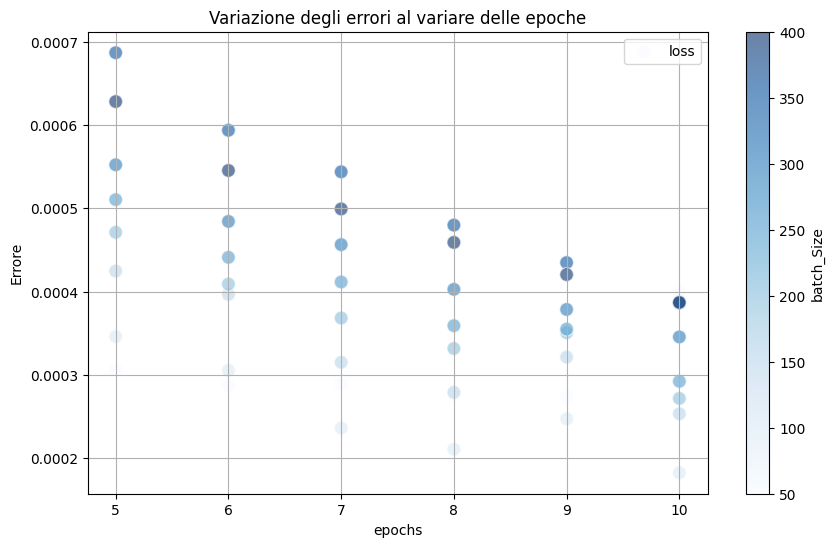

In [10]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df_res['epochs'], df_res['test_mean_absolute_percentage_error'], c=df_res['batch_size'], cmap='Blues', s=100, label='loss', alpha=0.6, edgecolors='w')
#plt.scatter(df_res['epochs'], df_res['test_mean_absolute_error'], c=df_res['batch_size'], cmap='Blues', s=200, label='MAE', alpha=0.6, edgecolors='w')
#plt.scatter(df_res['epochs'], df_res['test_mean_absolute_percentage_error'], marker='o', label='MAPE')
#plt.scatter(df_res['epochs'], df_res['test_r2_score'], marker='o', label='R2')

cbar = plt.colorbar(scatter)
cbar.set_label('batch_Size')
plt.xlabel('epochs')
plt.ylabel('Errore')
plt.title('Variazione degli errori al variare delle epoche')
plt.legend()
 
plt.grid(True)
plt.show()

In [11]:
# SLAVA MODELLO DOPO AVER TROVATO GLI IPERPARAMETRI MIGLIORI